In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split


In [2]:
df_train = pd.read_csv("fraudTrain.csv")
df_train.drop(df_train.columns[0], axis = 1, inplace = True)
pd.set_option('display.max_columns', None)
df_train.head(10)

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   
5   2019-01-01 00:04:08  4767265376804500    fraud_Stroman, Hudson and Erdman   
6   2019-01-01 00:04:42    30074693890476               fraud_Rowe-Vandervort   
7   2019-01-01 00:05:08  6011360759745864                fraud_Corwin-Collins   
8   2019-01-01 00:05:18  4922710831011201                    fraud_Herzog Ltd   
9   2019-01-01 00:06:01  2720830304681674   fraud_Schoen, Kuphal and Nitzsche   

        category     amt      first      last gender  \
0       misc_net    4.97   Jennifer     Banks      F   
1    grocery_pos  107.23  Stephanie      Gill      F   
2  entertainment  220.11     Edward   Sanchez      M   
3  gas_transport   45.00     Jeremy     White      M   
4       misc_pos   41.96      Tyler    Garcia      M   
5  gas_transport   94.63   Jennifer    Conner      F   
6    grocery_net   44.54     Kelsey  Richards      F   
7  gas_transport   71.65     Steven  Williams      M   
8       misc_pos    4.27    Heather     Chase      F   
9    grocery_pos  198.39    Melissa   Aguilar      F   

                           street            city state    zip      lat  \
0                  561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1    43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2        594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3     9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4                408 Bradley Rest        Doe Hill    VA  24433  38.4207   
5               4655 David Island          Dublin    PA  18917  40.3750   
6     889 Sarah Station Suite 624         Holcomb    KS  67851  37.9931   
7       231 Flores Pass Suite 720        Edinburg    VA  22824  38.8432   
8     6888 Hicks Stream Suite 954           Manor    PA  15665  40.3359   
9  21326 Taylor Squares Suite 708     Clarksville    TN  37040  36.5220   

       long  city_pop                                job         dob  \
0  -81.1781      3495          Psychologist, counselling  1988-03-09   
1 -118.2105       149  Special educational needs teacher  1978-06-21   
2 -112.2620      4154        Nature conservation officer  1962-01-19   
3 -112.1138      1939                    Patent attorney  1967-01-12   
4  -79.4629        99     Dance movement psychotherapist  1986-03-28   
5  -75.2045      2158                  Transport planner  1961-06-19   
6 -100.9893      2691                    Arboriculturist  1993-08-16   
7  -78.6003      6018               Designer, multimedia  1947-08-21   
8  -79.6607      1472          Public affairs consultant  1941-03-07   
9  -87.3490    151785                        Pathologist  1974-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
5  189a841a0a8ba03058526bcfe566aab5  1325376248  40.653382  -76.152667   
6  83ec1cc84142af6e2acf10c44949e720  1325376282  37.162705 -100.153370   
7  6d294ed2cc447d2c71c7171a3d54967c  1325376308  38.948089  -78.540296   
8  fc28024ce480f8ef21a32d64c93a29f5  1325376318  40.351813  -79.958146   
9  3b9014ea8fb80bd65de0b1463b00b00e  1325376361  37.179198  -87.485381   

   is_fraud  
0         0  
1         0  
2         0  
3  

In [3]:
df_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
X = df_train.drop('is_fraud', axis = 1)
y = df_train['is_fraud']

In [5]:
X.rename(columns = {'trans_date_trans_time':'transaction_time', 'cc_num':'credit_card_number', 'amt':'amount', 'trans_num':'transaction_id'}, inplace = True)
X.columns

Index(['transaction_time', 'credit_card_number', 'merchant', 'category',
       'amount', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'transaction_id', 'unix_time',
       'merch_lat', 'merch_long'],
      dtype='object')

In [6]:
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)
numerical_features = ['credit_card_number','amount','zip',
       'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

#Use fit_transform methode on X_train, so the model will learn from train dataset and the data will be normalised. 
X_train_scaled = scaler.fit_transform(X_train[numerical_features] )
#Use only transform methode on X_test, because the model should not learn from test dataset. 
#We only have to normalise this dataset. 
X_test_scaled = scaler.transform(X_test[numerical_features])

linlasso = Lasso().fit(X_train_scaled, y_train)
#max_iter to avoid converge warning. More leads to more computing time

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_train[numerical_features]), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 0.0057686019417875056
lasso regression linear model coeff:
[-0.  0. -0.  0.  0.  0.  0.  0.]
Non-zero features: 0
R-squared score (training): 0.000
R-squared score (test): -0.000

Features with non-zero weight (sorted by absolute magnitude):


In [7]:

y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [8]:
X = X.drop(columns = ["first", "last", "street", "unix_time"])
X.head()

transaction_time  credit_card_number  \
0  2019-01-01 00:00:18    2703186189652095   
1  2019-01-01 00:00:44        630423337322   
2  2019-01-01 00:00:51      38859492057661   
3  2019-01-01 00:01:16    3534093764340240   
4  2019-01-01 00:03:06     375534208663984   

                             merchant       category  amount gender  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2                fraud_Lind-Buckridge  entertainment  220.11      M   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M   
4                 fraud_Keeling-Crist       misc_pos   41.96      M   

             city state    zip      lat      long  city_pop  \
0  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1          Orient    WA  99160  48.8878 -118.2105       149   
2      Malad City    ID  83252  42.1808 -112.2620      4154   
3         Boulder    MT  59632  46.2306 -112.1138      1939   
4        Doe Hill    VA  24433  38.4207  -79.4629        99   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   
2        Nature conservation officer  1962-01-19   
3                    Patent attorney  1967-01-12   
4     Dance movement psychotherapist  1986-03-28   

                     transaction_id  merch_lat  merch_long  
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315  
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462  
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481  
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071  
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459

In [9]:
# convert Date and Time to Unix timestamps

from datetime import timezone
import datetime

X['unix_time'] = X['transaction_time'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone.utc).timestamp())
X['unix_time'] = X['unix_time'].apply(np.int64)

In [10]:
X

transaction_time   credit_card_number  \
0        2019-01-01 00:00:18     2703186189652095   
1        2019-01-01 00:00:44         630423337322   
2        2019-01-01 00:00:51       38859492057661   
3        2019-01-01 00:01:16     3534093764340240   
4        2019-01-01 00:03:06      375534208663984   
...                      ...                  ...   
1296670  2020-06-21 12:12:08       30263540414123   
1296671  2020-06-21 12:12:19     6011149206456997   
1296672  2020-06-21 12:12:32     3514865930894695   
1296673  2020-06-21 12:13:36     2720012583106919   
1296674  2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category  amount gender  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97      F   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2                       fraud_Lind-Buckridge  entertainment  220.11      M   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M   
4                        fraud_Keeling-Crist       misc_pos   41.96      M   
...                                      ...            ...     ...    ...   
1296670                    fraud_Reichel Inc  entertainment   15.56      M   
1296671             fraud_Abernathy and Sons    food_dining   51.70      M   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93      M   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90      M   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30      M   

                             city state    zip      lat      long  city_pop  \
0                  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1                          Orient    WA  99160  48.8878 -118.2105       149   
2                      Malad City    ID  83252  42.1808 -112.2620      4154   
3                         Boulder    MT  59632  46.2306 -112.1138      1939   
4                        Doe Hill    VA  24433  38.4207  -79.4629        99   
...                           ...   ...    ...      ...       ...       ...   
1296670                     Hatch    UT  84735  37.7175 -112.4777       258   
1296671                 Tuscarora    MD  21790  39.2667  -77.5101       100   
1296672  High Rolls Mountain Park    NM  88325  32.9396 -105.8189       899   
1296673                 Manderson    SD  57756  43.3526 -102.5411      1126   
1296674                      Sula    MT  59871  45.8433 -113.8748       218   

                                       job         dob  \
0                Psychologist, counselling  1988-03-09   
1        Special educational needs teacher  1978-06-21   
2              Nature conservation officer  1962-01-19   
3                          Patent attorney  1967-01-12   
4           Dance movement psychotherapist  1986-03-28   
...                                    ...         ...   
1296670                       Geoscientist  1961-11-24   
1296671   Production assistant, television  1979-12-11   
1296672                    Naval architect  1967-08-30   
1296673              Volunteer coordinator  1980-08-18   
1296674           Therapist, horticultural  1995-08-16   

                           transaction_id  merch_lat  merch_long   unix_time  
0        0b242abb623afc578575680df30655b9  36.011293  -82.048315  1546300818  
1        1f76529f8574734946361c461b024d99  49.159047 -118.186462  1546300844  
2        a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481  1546300851  
3        6b849c168bdad6f867558c3793159a81  47.034331 -112.561071  1546300876  
4        a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459  1546300986  
...                                   ...        ...         ...         ...  
1296670  440b587732da4dc1a6395aba5fb41669  36.841266 -111.690765  1592741528  
1296671  278000d2e0d2277d1de2f890067dcc0a  38.906881  -78.246528  1592741539  
1296672  483f52fe67fabef353d552c1e662974c  33.619513 -105.130529  1592741552  
12

In [11]:
X['lat_difference'] = abs(X['lat'] - X['merch_lat'])
X['long_difference'] = abs(X['long'] - X['merch_long'])

X['distance'] = np.sqrt(pow((X['lat_difference']*111.32),2) + pow((X['long_difference']*111.32),2))
X['distance'].round(2)
X.head()

transaction_time  credit_card_number  \
0  2019-01-01 00:00:18    2703186189652095   
1  2019-01-01 00:00:44        630423337322   
2  2019-01-01 00:00:51      38859492057661   
3  2019-01-01 00:01:16    3534093764340240   
4  2019-01-01 00:03:06     375534208663984   

                             merchant       category  amount gender  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2                fraud_Lind-Buckridge  entertainment  220.11      M   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M   
4                 fraud_Keeling-Crist       misc_pos   41.96      M   

             city state    zip      lat      long  city_pop  \
0  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1          Orient    WA  99160  48.8878 -118.2105       149   
2      Malad City    ID  83252  42.1808 -112.2620      4154   
3         Boulder    MT  59632  46.2306 -112.1138      1939   
4        Doe Hill    VA  24433  38.4207  -79.4629        99   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   
2        Nature conservation officer  1962-01-19   
3                    Patent attorney  1967-01-12   
4     Dance movement psychotherapist  1986-03-28   

                     transaction_id  merch_lat  merch_long   unix_time  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315  1546300818   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462  1546300844   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481  1546300851   
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071  1546300876   
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459  1546300986   

   lat_difference  long_difference    distance  
0        0.067507         0.870215   97.163380  
1        0.271247         0.024038   30.313554  
2        0.969904         0.107519  108.631102  
3        0.803731         0.447271  102.392307  
4        0.254299         0.830441   96.681932

In [12]:

X = X.drop(columns = ["lat", "long", "merch_long", "merch_lat", "lat_difference", "long_difference"])
X.head()

transaction_time  credit_card_number  \
0  2019-01-01 00:00:18    2703186189652095   
1  2019-01-01 00:00:44        630423337322   
2  2019-01-01 00:00:51      38859492057661   
3  2019-01-01 00:01:16    3534093764340240   
4  2019-01-01 00:03:06     375534208663984   

                             merchant       category  amount gender  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2                fraud_Lind-Buckridge  entertainment  220.11      M   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M   
4                 fraud_Keeling-Crist       misc_pos   41.96      M   

             city state    zip  city_pop                                job  \
0  Moravian Falls    NC  28654      3495          Psychologist, counselling   
1          Orient    WA  99160       149  Special educational needs teacher   
2      Malad City    ID  83252      4154        Nature conservation officer   
3         Boulder    MT  59632      1939                    Patent attorney   
4        Doe Hill    VA  24433        99     Dance movement psychotherapist   

          dob                    transaction_id   unix_time    distance  
0  1988-03-09  0b242abb623afc578575680df30655b9  1546300818   97.163380  
1  1978-06-21  1f76529f8574734946361c461b024d99  1546300844   30.313554  
2  1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1546300851  108.631102  
3  1967-01-12  6b849c168bdad6f867558c3793159a81  1546300876  102.392307  
4  1986-03-28  a41d7549acf90789359a9aa5346dcb46  1546300986   96.681932

In [13]:

# define a function of box plot
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

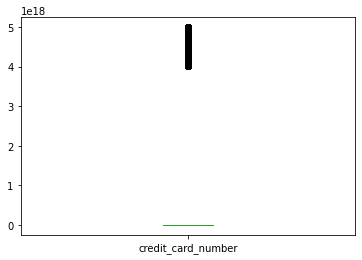

In [14]:
plot_boxplot(X, 'credit_card_number')

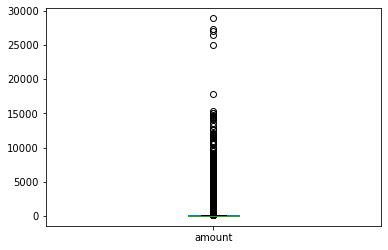

In [15]:
plot_boxplot(X, 'amount')

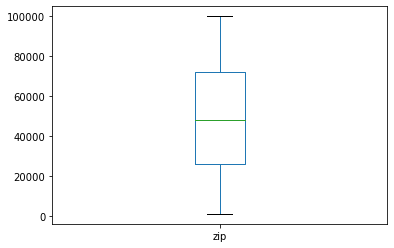

In [16]:

plot_boxplot(X, 'zip')

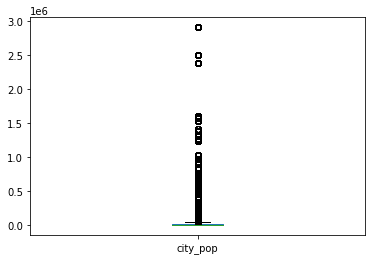

In [17]:

plot_boxplot(X, 'city_pop')

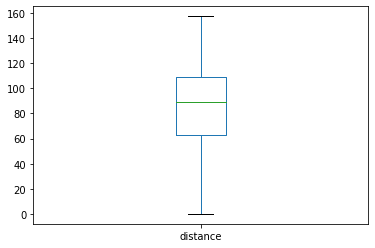

In [18]:

plot_boxplot(X, 'distance')

In [19]:
# define a function of removing outliers

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR

    ls = df.index[(df[ft]<lower_boundary)|(df[ft]>upper_boundary)]

    return ls

In [20]:
index_list = []
for feature in ['zip','amount','distance']:
    index_list.extend(outliers(X, feature))

In [21]:
len(index_list)

67290

In [22]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [23]:
X_cleaned = remove(X,index_list)

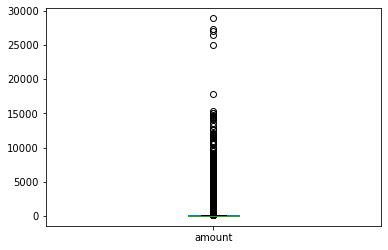

In [24]:
plot_boxplot(X, 'amount')

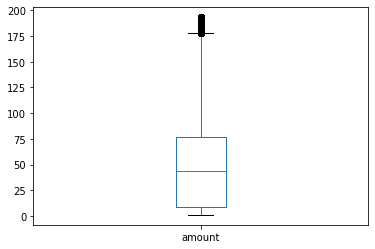

In [25]:
plot_boxplot(X_cleaned, 'amount')

In [26]:
X_cleaned.shape

(1229385, 15)

In [27]:
X.shape

(1296675, 15)

In [28]:
y_cleaned = remove(y, index_list)
y_cleaned.shape

(1229385,)

In [29]:
y.shape

(1296675,)

In [30]:
X_cleaned.reset_index(inplace=True)
X_cleaned.drop(columns={'index'},inplace=True)
X_cleaned

transaction_time   credit_card_number  \
0        2019-01-01 00:00:18     2703186189652095   
1        2019-01-01 00:00:44         630423337322   
2        2019-01-01 00:01:16     3534093764340240   
3        2019-01-01 00:03:06      375534208663984   
4        2019-01-01 00:04:08     4767265376804500   
...                      ...                  ...   
1229380  2020-06-21 12:12:08       30263540414123   
1229381  2020-06-21 12:12:19     6011149206456997   
1229382  2020-06-21 12:12:32     3514865930894695   
1229383  2020-06-21 12:13:36     2720012583106919   
1229384  2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category  amount gender  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97      F   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M   
3                        fraud_Keeling-Crist       misc_pos   41.96      M   
4           fraud_Stroman, Hudson and Erdman  gas_transport   94.63      F   
...                                      ...            ...     ...    ...   
1229380                    fraud_Reichel Inc  entertainment   15.56      M   
1229381             fraud_Abernathy and Sons    food_dining   51.70      M   
1229382                 fraud_Stiedemann Ltd    food_dining  105.93      M   
1229383  fraud_Reinger, Weissnat and Strosin    food_dining   74.90      M   
1229384  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30      M   

                             city state    zip  city_pop  \
0                  Moravian Falls    NC  28654      3495   
1                          Orient    WA  99160       149   
2                         Boulder    MT  59632      1939   
3                        Doe Hill    VA  24433        99   
4                          Dublin    PA  18917      2158   
...                           ...   ...    ...       ...   
1229380                     Hatch    UT  84735       258   
1229381                 Tuscarora    MD  21790       100   
1229382  High Rolls Mountain Park    NM  88325       899   
1229383                 Manderson    SD  57756      1126   
1229384                      Sula    MT  59871       218   

                                       job         dob  \
0                Psychologist, counselling  1988-03-09   
1        Special educational needs teacher  1978-06-21   
2                          Patent attorney  1967-01-12   
3           Dance movement psychotherapist  1986-03-28   
4                        Transport planner  1961-06-19   
...                                    ...         ...   
1229380                       Geoscientist  1961-11-24   
1229381   Production assistant, television  1979-12-11   
1229382                    Naval architect  1967-08-30   
1229383              Volunteer coordinator  1980-08-18   
1229384           Therapist, horticultural  1995-08-16   

                           transaction_id   unix_time    distance  
0        0b242abb623afc578575680df30655b9  1546300818   97.163380  
1        1f76529f8574734946361c461b024d99  1546300844   30.313554  
2        6b849c168bdad6f867558c3793159a81  1546300876  102.392307  
3        a41d7549acf90789359a9aa5346dcb46  1546300986   96.681932  
4        189a841a0a8ba03058526bcfe566aab5  1546301048  110.005182  
...                                   ...         ...         ...  
1229380  440b587732da4dc1a6395aba5fb41669  1592741528  131.105129  
1229381  278000d2e0d2277d1de2f890067dcc0a  1592741539   91.241386  
1229382  483f52fe67fabef353d552c1e662974c  1592741552  107.706706  
1229383  d667cdcbadaaed3da3f4020e83591c83  1592741616  100.051639  
1229384  8f7c8e4ab7f25875d753b422917c98c9  1592741617   87.595800  

[1229385 rows x 15 columns]

In [31]:
y_cleaned.reset_index(drop=True,inplace=True)

In [32]:
# Mias task
X_cleaned.head()

transaction_time  credit_card_number  \
0  2019-01-01 00:00:18    2703186189652095   
1  2019-01-01 00:00:44        630423337322   
2  2019-01-01 00:01:16    3534093764340240   
3  2019-01-01 00:03:06     375534208663984   
4  2019-01-01 00:04:08    4767265376804500   

                             merchant       category  amount gender  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M   
3                 fraud_Keeling-Crist       misc_pos   41.96      M   
4    fraud_Stroman, Hudson and Erdman  gas_transport   94.63      F   

             city state    zip  city_pop                                job  \
0  Moravian Falls    NC  28654      3495          Psychologist, counselling   
1          Orient    WA  99160       149  Special educational needs teacher   
2         Boulder    MT  59632      1939                    Patent attorney   
3        Doe Hill    VA  24433        99     Dance movement psychotherapist   
4          Dublin    PA  18917      2158                  Transport planner   

          dob                    transaction_id   unix_time    distance  
0  1988-03-09  0b242abb623afc578575680df30655b9  1546300818   97.163380  
1  1978-06-21  1f76529f8574734946361c461b024d99  1546300844   30.313554  
2  1967-01-12  6b849c168bdad6f867558c3793159a81  1546300876  102.392307  
3  1986-03-28  a41d7549acf90789359a9aa5346dcb46  1546300986   96.681932  
4  1961-06-19  189a841a0a8ba03058526bcfe566aab5  1546301048  110.005182

In [33]:
y_cleaned.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [34]:
X_cleaned.dtypes

transaction_time       object
credit_card_number      int64
merchant               object
category               object
amount                float64
gender                 object
city                   object
state                  object
zip                     int64
city_pop                int64
job                    object
dob                    object
transaction_id         object
unix_time               int64
distance              float64
dtype: object

In [35]:
y_cleaned.dtypes

dtype('int64')

In [36]:
#now, I am going to include only the object columns in our dataframe
obj_df = X_cleaned.select_dtypes(include=['object']).copy()
obj_df.head()

transaction_time                            merchant       category  \
0  2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
1  2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2  2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
3  2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   
4  2019-01-01 00:04:08    fraud_Stroman, Hudson and Erdman  gas_transport   

  gender            city state                                job         dob  \
0      F  Moravian Falls    NC          Psychologist, counselling  1988-03-09   
1      F          Orient    WA  Special educational needs teacher  1978-06-21   
2      M         Boulder    MT                    Patent attorney  1967-01-12   
3      M        Doe Hill    VA     Dance movement psychotherapist  1986-03-28   
4      F          Dublin    PA                  Transport planner  1961-06-19   

                     transaction_id  
0  0b242abb623afc578575680df30655b9  
1  1f76529f8574734946361c461b024d99  
2  6b849c168bdad6f867558c3793159a81  
3  a41d7549acf90789359a9aa5346dcb46  
4  189a841a0a8ba03058526bcfe566aab5

In [37]:
#check if there is missing data
obj_df.isna().sum()

transaction_time    0
merchant            0
category            0
gender              0
city                0
state               0
job                 0
dob                 0
transaction_id      0
dtype: int64

In [38]:
#Label Encoding
#Encoding, Replace categorical data with number
data_category = X_cleaned.select_dtypes(exclude=[np.number])

In [39]:
data_category.head()

transaction_time                            merchant       category  \
0  2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
1  2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2  2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
3  2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   
4  2019-01-01 00:04:08    fraud_Stroman, Hudson and Erdman  gas_transport   

  gender            city state                                job         dob  \
0      F  Moravian Falls    NC          Psychologist, counselling  1988-03-09   
1      F          Orient    WA  Special educational needs teacher  1978-06-21   
2      M         Boulder    MT                    Patent attorney  1967-01-12   
3      M        Doe Hill    VA     Dance movement psychotherapist  1986-03-28   
4      F          Dublin    PA                  Transport planner  1961-06-19   

                     transaction_id  
0  0b242abb623afc578575680df30655b9  
1  1f76529f8574734946361c461b024d99  
2  6b849c168bdad6f867558c3793159a81  
3  a41d7549acf90789359a9aa5346dcb46  
4  189a841a0a8ba03058526bcfe566aab5

In [40]:
## Lets take one categorical column "city" and see the unique categorical values in it, so that we could replace it with numerical value
data_category['city'].unique()

array(['Moravian Falls', 'Orient', 'Boulder', 'Doe Hill', 'Dublin',
       'Holcomb', 'Edinburg', 'Manor', 'Clarinda', 'Shenandoah Junction',
       'Saint Petersburg', 'Grenada', 'High Rolls Mountain Park',
       'Harrington Park', 'Harborcreek', 'Elizabeth', 'Methuen',
       'Moulton', 'Plainfield', 'May', 'Waukesha', 'Bailey', 'Romulus',
       'Freedom', 'Honokaa', 'Valentine', 'Westfir', 'Tiptonville',
       'Republic', 'Baton Rouge', 'Washington', 'Big Creek', 'Florence',
       'Allentown', 'Esbon', 'Chatham', 'Thompson', 'North Prairie',
       'Laredo', 'Grant', 'Conway', 'New Goshen', 'Sunflower', 'Enola',
       'Roosevelt', 'Pointe Aux Pins', 'Dallas', 'North Tonawanda',
       'Athena', 'Chester', 'Elkhart', 'Surrency', 'Arcadia',
       'Gaithersburg', 'Bowdoin', 'Heart Butte', 'San Jose', 'Rumely',
       'Ravenna', 'Utica', 'Uledi', 'Naples', 'Thida', 'Central',
       'Fort Washakie', 'Etlan', 'Brinson', 'Shrewsbury', 'Bigelow',
       'North Washington', 'Holloway'

In [41]:
#Find the frequency distribution of each categorical column. To do so, use the value_counts() function on each column. This function returns the counts of unique values in an object
data_category.city.value_counts()

Birmingham     5430
Utica          4942
San Antonio    4939
Phoenix        4651
Thomas         4527
               ... 
Seattle           1
Morven            1
Oakton            1
Irvington         1
Freeport          1
Name: city, Length: 885, dtype: int64

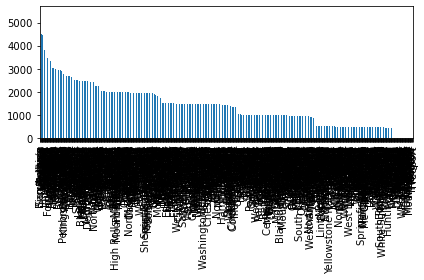

In [42]:
fig=X_cleaned['city'].value_counts().plot.bar().get_figure()
fig.tight_layout()

In [43]:
#dataframe with categorical data
data_category = X_cleaned.select_dtypes(exclude=[np.number]).columns

In [44]:
data_category

Index(['transaction_time', 'merchant', 'category', 'gender', 'city', 'state',
       'job', 'dob', 'transaction_id'],
      dtype='object')

In [45]:
X_cleaned[data_category].head()

transaction_time                            merchant       category  \
0  2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
1  2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2  2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
3  2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   
4  2019-01-01 00:04:08    fraud_Stroman, Hudson and Erdman  gas_transport   

  gender            city state                                job         dob  \
0      F  Moravian Falls    NC          Psychologist, counselling  1988-03-09   
1      F          Orient    WA  Special educational needs teacher  1978-06-21   
2      M         Boulder    MT                    Patent attorney  1967-01-12   
3      M        Doe Hill    VA     Dance movement psychotherapist  1986-03-28   
4      F          Dublin    PA                  Transport planner  1961-06-19   

                     transaction_id  
0  0b242abb623afc578575680df30655b9  
1  1f76529f8574734946361c461b024d99  
2  6b849c168bdad6f867558c3793159a81  
3  a41d7549acf90789359a9aa5346dcb46  
4  189a841a0a8ba03058526bcfe566aab5

In [46]:
from sklearn.preprocessing import LabelEncoder

# Creating the object instance for label encoder

label_encoder = LabelEncoder()
for i in data_category:
    X_cleaned[i] = label_encoder.fit_transform(X_cleaned[i])
X_cleaned.head()

transaction_time  credit_card_number  merchant  category  amount  gender  \
0                 0    2703186189652095       514         8    4.97       0   
1                 1        630423337322       241         4  107.23       0   
2                 2    3534093764340240       360         2   45.00       1   
3                 3     375534208663984       297         9   41.96       1   
4                 4    4767265376804500       607         2   94.63       0   

   city  state    zip  city_pop  job  dob  transaction_id   unix_time  \
0   522     27  28654      3495  369  768           53546  1546300818   
1   606     47  99160       149  425  596          151231  1546300844   
2    83     26  59632      1939  327  387          516270  1546300876   
3   213     45  24433        99  115  723          787978  1546300986   
4   220     38  18917      2158  476  283          118292  1546301048   

     distance  
0   97.163380  
1   30.313554  
2  102.392307  
3   96.681932  
4  110.005182

In [47]:
X_cleaned.dtypes

transaction_time        int32
credit_card_number      int64
merchant                int32
category                int32
amount                float64
gender                  int32
city                    int32
state                   int32
zip                     int64
city_pop                int64
job                     int32
dob                     int32
transaction_id          int32
unix_time               int64
distance              float64
dtype: object

In [48]:
X_cleaned

transaction_time   credit_card_number  merchant  category  amount  \
0                       0     2703186189652095       514         8    4.97   
1                       1         630423337322       241         4  107.23   
2                       2     3534093764340240       360         2   45.00   
3                       3      375534208663984       297         9   41.96   
4                       4     4767265376804500       607         2   94.63   
...                   ...                  ...       ...       ...     ...   
1229380           1209700       30263540414123       499         0   15.56   
1229381           1209701     6011149206456997         2         1   51.70   
1229382           1209702     3514865930894695       599         1  105.93   
1229383           1209703     2720012583106919       509         1   74.90   
1229384           1209704  4292902571056973207       370         1    4.30   

         gender  city  state    zip  city_pop  job  dob  transaction_id  \
0             0   522     27  28654      3495  369  768           53546   
1             0   606     47  99160       149  425  596          151231   
2             1    83     26  59632      1939  327  387          516270   
3             1   213     45  24433        99  115  723          787978   
4             0   220     38  18917      2158  476  283          118292   
...         ...   ...    ...    ...       ...  ...  ...             ...   
1229380       1   327     44  84735       258  214  291          326866   
1229381       1   805     20  21790       100  359  619          189705   
1229382       1   343     32  88325       899  307  402          347089   
1229383       1   467     41  57756      1126  482  628         1029854   
1229384       1   774     26  59871       218  464  884          688878   

          unix_time    distance  
0        1546300818   97.163380  
1        1546300844   30.313554  
2        1546300876  102.392307  
3        1546300986   96.681932  
4        1546301048  110.005182  
...             ...         ...  
1229380  1592741528  131.105129  
1229381  1592741539   91.241386  
1229382  1592741552  107.706706  
1229383  1592741616  100.051639  
1229384  1592741617   87.595800  

[1229385 rows x 15 columns]

other features engineering: create new columns about datatime -- done by Shujiao

In [49]:
from datetime import datetime
X_cleaned['Date_Time'] = X_cleaned['unix_time'].apply(lambda x: datetime.utcfromtimestamp(x))
X_cleaned 

transaction_time   credit_card_number  merchant  category  amount  \
0                       0     2703186189652095       514         8    4.97   
1                       1         630423337322       241         4  107.23   
2                       2     3534093764340240       360         2   45.00   
3                       3      375534208663984       297         9   41.96   
4                       4     4767265376804500       607         2   94.63   
...                   ...                  ...       ...       ...     ...   
1229380           1209700       30263540414123       499         0   15.56   
1229381           1209701     6011149206456997         2         1   51.70   
1229382           1209702     3514865930894695       599         1  105.93   
1229383           1209703     2720012583106919       509         1   74.90   
1229384           1209704  4292902571056973207       370         1    4.30   

         gender  city  state    zip  city_pop  job  dob  transaction_id  \
0             0   522     27  28654      3495  369  768           53546   
1             0   606     47  99160       149  425  596          151231   
2             1    83     26  59632      1939  327  387          516270   
3             1   213     45  24433        99  115  723          787978   
4             0   220     38  18917      2158  476  283          118292   
...         ...   ...    ...    ...       ...  ...  ...             ...   
1229380       1   327     44  84735       258  214  291          326866   
1229381       1   805     20  21790       100  359  619          189705   
1229382       1   343     32  88325       899  307  402          347089   
1229383       1   467     41  57756      1126  482  628         1029854   
1229384       1   774     26  59871       218  464  884          688878   

          unix_time    distance           Date_Time  
0        1546300818   97.163380 2019-01-01 00:00:18  
1        1546300844   30.313554 2019-01-01 00:00:44  
2        1546300876  102.392307 2019-01-01 00:01:16  
3        1546300986   96.681932 2019-01-01 00:03:06  
4        1546301048  110.005182 2019-01-01 00:04:08  
...             ...         ...                 ...  
1229380  1592741528  131.105129 2020-06-21 12:12:08  
1229381  1592741539   91.241386 2020-06-21 12:12:19  
1229382  1592741552  107.706706 2020-06-21 12:12:32  
1229383  1592741616  100.051639 2020-06-21 12:13:36  
1229384  1592741617   87.595800 2020-06-21 12:13:37  

[1229385 rows x 16 columns]

In [50]:
X_cleaned['hour'] = X_cleaned['Date_Time'].dt.hour
X_cleaned['day'] = X_cleaned['Date_Time'].dt.weekday
X_cleaned

transaction_time   credit_card_number  merchant  category  amount  \
0                       0     2703186189652095       514         8    4.97   
1                       1         630423337322       241         4  107.23   
2                       2     3534093764340240       360         2   45.00   
3                       3      375534208663984       297         9   41.96   
4                       4     4767265376804500       607         2   94.63   
...                   ...                  ...       ...       ...     ...   
1229380           1209700       30263540414123       499         0   15.56   
1229381           1209701     6011149206456997         2         1   51.70   
1229382           1209702     3514865930894695       599         1  105.93   
1229383           1209703     2720012583106919       509         1   74.90   
1229384           1209704  4292902571056973207       370         1    4.30   

         gender  city  state    zip  city_pop  job  dob  transaction_id  \
0             0   522     27  28654      3495  369  768           53546   
1             0   606     47  99160       149  425  596          151231   
2             1    83     26  59632      1939  327  387          516270   
3             1   213     45  24433        99  115  723          787978   
4             0   220     38  18917      2158  476  283          118292   
...         ...   ...    ...    ...       ...  ...  ...             ...   
1229380       1   327     44  84735       258  214  291          326866   
1229381       1   805     20  21790       100  359  619          189705   
1229382       1   343     32  88325       899  307  402          347089   
1229383       1   467     41  57756      1126  482  628         1029854   
1229384       1   774     26  59871       218  464  884          688878   

          unix_time    distance           Date_Time  hour  day  
0        1546300818   97.163380 2019-01-01 00:00:18     0    1  
1        1546300844   30.313554 2019-01-01 00:00:44     0    1  
2        1546300876  102.392307 2019-01-01 00:01:16     0    1  
3        1546300986   96.681932 2019-01-01 00:03:06     0    1  
4        1546301048  110.005182 2019-01-01 00:04:08     0    1  
...             ...         ...                 ...   ...  ...  
1229380  1592741528  131.105129 2020-06-21 12:12:08    12    6  
1229381  1592741539   91.241386 2020-06-21 12:12:19    12    6  
1229382  1592741552  107.706706 2020-06-21 12:12:32    12    6  
1229383  1592741616  100.051639 2020-06-21 12:13:36    12    6  
1229384  1592741617   87.595800 2020-06-21 12:13:37    12    6  

[1229385 rows x 18 columns]

In [51]:
X_cleaned['weekend']= np.where(X_cleaned['day'].isin([5,6]),1,0)
X_cleaned.drop(columns={'Date_Time'},inplace=True)
X_cleaned

transaction_time   credit_card_number  merchant  category  amount  \
0                       0     2703186189652095       514         8    4.97   
1                       1         630423337322       241         4  107.23   
2                       2     3534093764340240       360         2   45.00   
3                       3      375534208663984       297         9   41.96   
4                       4     4767265376804500       607         2   94.63   
...                   ...                  ...       ...       ...     ...   
1229380           1209700       30263540414123       499         0   15.56   
1229381           1209701     6011149206456997         2         1   51.70   
1229382           1209702     3514865930894695       599         1  105.93   
1229383           1209703     2720012583106919       509         1   74.90   
1229384           1209704  4292902571056973207       370         1    4.30   

         gender  city  state    zip  city_pop  job  dob  transaction_id  \
0             0   522     27  28654      3495  369  768           53546   
1             0   606     47  99160       149  425  596          151231   
2             1    83     26  59632      1939  327  387          516270   
3             1   213     45  24433        99  115  723          787978   
4             0   220     38  18917      2158  476  283          118292   
...         ...   ...    ...    ...       ...  ...  ...             ...   
1229380       1   327     44  84735       258  214  291          326866   
1229381       1   805     20  21790       100  359  619          189705   
1229382       1   343     32  88325       899  307  402          347089   
1229383       1   467     41  57756      1126  482  628         1029854   
1229384       1   774     26  59871       218  464  884          688878   

          unix_time    distance  hour  day  weekend  
0        1546300818   97.163380     0    1        0  
1        1546300844   30.313554     0    1        0  
2        1546300876  102.392307     0    1        0  
3        1546300986   96.681932     0    1        0  
4        1546301048  110.005182     0    1        0  
...             ...         ...   ...  ...      ...  
1229380  1592741528  131.105129    12    6        1  
1229381  1592741539   91.241386    12    6        1  
1229382  1592741552  107.706706    12    6        1  
1229383  1592741616  100.051639    12    6        1  
1229384  1592741617   87.595800    12    6        1  

[1229385 rows x 18 columns]

In [52]:
print(X_cleaned.shape)
print(y_cleaned.shape)

(1229385, 18)
(1229385,)


In [53]:
# Maxs task

from imblearn.over_sampling import SMOTE

y_cleaned.value_counts().to_frame().T

from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_cleaned, y_cleaned)
y_resampled.value_counts().to_frame().T 

0        1
is_fraud  1227584  1227584

In [54]:
print(X_cleaned.shape)
print(y_cleaned.shape)

(1229385, 18)
(1229385,)


In [54]:
print(X_resampled.shape)
print(y_resampled.shape)

(2455168, 18)
(2455168,)


## RandomForest

In [55]:
import glob
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# pip install numpy scipy scikit-learn

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [56]:
X_test = X_resampled.copy()
y_test = y_resampled.copy()

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.5)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1227584, 18), (1227584, 18), (1227584,), (1227584,))

In [58]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Train the model

In [59]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train) # Train
y_pred = rf.predict(X=X_val) #Prediction

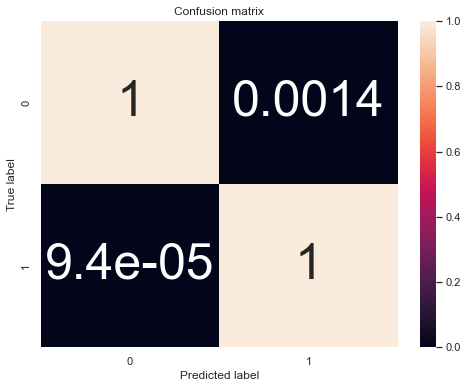

In [60]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

In [61]:
# Accuracy on Training
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Validation
print("Validation Accuracy is: ", rf.score(X_val, y_val))

# F1 score
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
F1 = (2*TP)/(2*TP+FP+FN)
print('F1 score is:', F1)

Training Accuracy is:  1.0
Validation Accuracy is:  0.9992489312340337
F1 score is: 0.9992495767678083


### Tunning the Parameter

In [62]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

print(random_grid)

{'n_estimators': [50, 100, 150, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [63]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score, greater_is_better=True, pos_label=1)

In [64]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 50,
                               cv = 5,
                               verbose=2,
                               random_state=42
                              )

#Fit and show the best parameters
rf_random.fit(X_train, y_train)
print('this is best:', rf_random.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time= 4.0min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time= 4.1min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time= 4.1min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time= 4.2min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time= 4.1min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=14.4min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=14.4min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimato

In [65]:
from sklearn.metrics import classification_report
rf_random = RandomForestClassifier(max_depth=50, max_features='auto', min_samples_leaf=4, min_samples_split=5, n_estimators=150)

rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_val)

# Print reprort
print(classification_report(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)

# F1 score
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
F1 = (2*TP)/(2*TP+FP+FN)
print('F1 score is:', F1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    613667
           1       1.00      1.00      1.00    613917

    accuracy                           1.00   1227584
   macro avg       1.00      1.00      1.00   1227584
weighted avg       1.00      1.00      1.00   1227584

F1 score is: 0.9984984838428402


In [66]:
from sklearn.metrics import classification_report
rf_random = RandomForestClassifier(n_estimators=200)

rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_val)

# Print reprort
print(classification_report(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)

# F1 score
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
F1 = (2*TP)/(2*TP+FP+FN)
print('F1 score is:', F1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    613667
           1       1.00      1.00      1.00    613917

    accuracy                           1.00   1227584
   macro avg       1.00      1.00      1.00   1227584
weighted avg       1.00      1.00      1.00   1227584

F1 score is: 0.9991039871351759


### ROC

In [68]:
rf_probs = rf_random.predict_proba(X_val)
rf_probs = rf_probs[:, 1]

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score


# calculate Auroc: ROC is the receiver operating characteristic AUROC is the area under the ROC curve
rf_auc = roc_auc_score(y_val, rf_probs)

# AUROC scores
print('Random Forest: AUROC = %.3f' % (rf_auc))

Random Forest: AUROC = 1.000


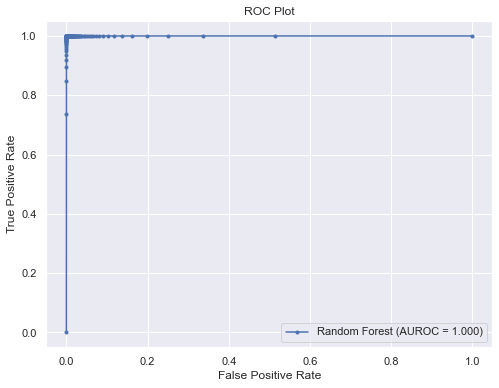

In [70]:
rf_fpr, rf_tpr, _ = roc_curve(y_val, rf_probs)


#plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## sampling

In [55]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sn

from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef

def get_acc_and_F1(ratio):
    # create the synthetic dataset
    X_cleaned, y_cleaned = make_classification(n_samples=25000, 
                            n_features=20, 
                            n_informative=2, 
                            n_redundant=2, 
                            n_repeated=0, 
                            n_classes=2, 
                            n_clusters_per_class=2, 
                            weights=[ratio, 1-ratio], 
                            flip_y=0.01, 
                            class_sep=1.0, 
                            hypercube=True, 
                            shift=0.0, 
                            scale=1.0, 
                            shuffle=True, 
                            random_state=42)

                        

In [56]:
print(X_cleaned.shape)
print(y_cleaned.shape)

(1229385, 18)
(1229385,)


X_cleaned = (1000, 2)

In [57]:
X_sample, y_sample = make_classification(n_samples=1000, 
                            n_classes=2,
                            n_features=2,
                            n_informative=2, 
                            n_redundant=0, 
                            n_repeated=0,
                            weights=[0.99, 1-0.99],
                            class_sep=0.3,
                            random_state=2)

In [58]:
print(X_cleaned.shape)
print(y_cleaned.shape)

(1229385, 18)
(1229385,)


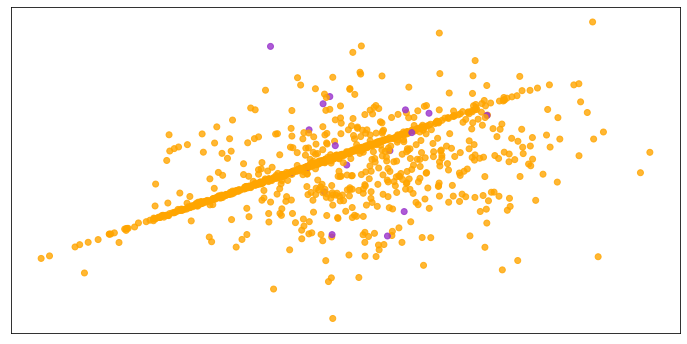

In [59]:
# define the colours to use
my_cmap = matplotlib.colors.ListedColormap(['orange', 'darkorchid'])
# now make a scatter plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.scatter(X_sample[:, 0], X_sample[:, 1], c=y_sample, cmap=my_cmap, alpha=0.8)
# hide the labels
plt.xticks([])
plt.yticks([])
plt.show();

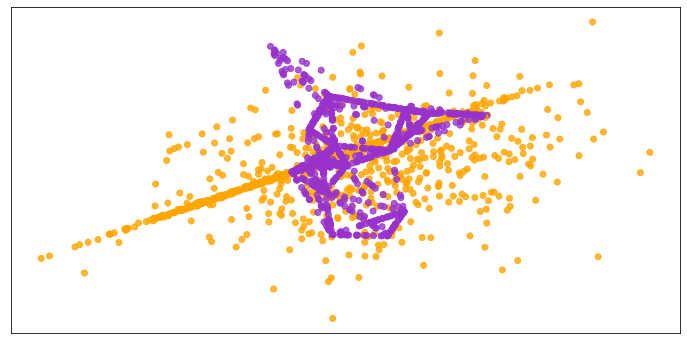

In [60]:
# SMOTE PLOT 
X_resampled, y_resampled = SMOTE().fit_resample(X_sample, y_sample)
# plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap=my_cmap, alpha=0.8)
plt.xticks([])
plt.yticks([])
plt.show();

In [61]:
len(X_resampled)

1964

Visualization

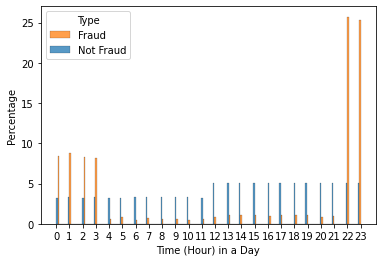

In [62]:
#Visualization

#Daytime, where fraud happens
df_train['hour']=pd.to_datetime(df_train['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=df_train, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

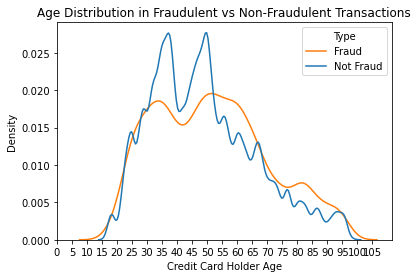

In [63]:
#Age of person & fraudulent/not fraudulent

import datetime as dt
df_train['age']=dt.date.today().year-pd.to_datetime(df_train['dob']).dt.year
ax=sns.kdeplot(x='age',data=df_train, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

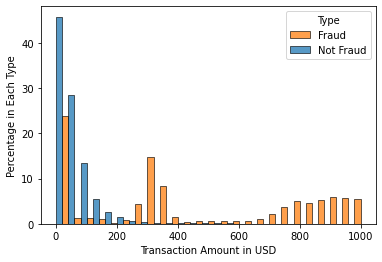

In [64]:
#Distribution of amount of fraudulent transactions

ax=sns.histplot(x='amt',data=df_train[df_train.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

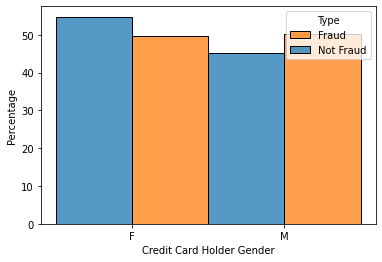

In [65]:
#Comparison of male vs female transactions

ax=sns.histplot(x='gender',data=df_train, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

C:\Users\Shujiao\AppData\Local\Temp/ipykernel_36640/2915282688.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


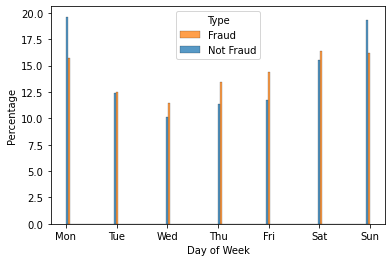

In [66]:
#Distribution of weekdays

df_train['day']=pd.to_datetime(df_train['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=df_train, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

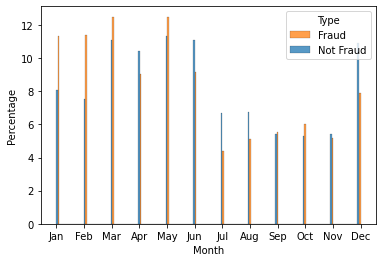

In [67]:
#Distribution of months

df_train['month']=pd.to_datetime(df_train['trans_date_trans_time']).dt.month
ax=sns.histplot(data=df_train, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])